In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# 1. Data Loading and Initial Inspection
df = pd.read_csv('./data/spotify_churn_dataset.csv')

In [3]:
print("--- First 5 Rows of the Dataset ---")
print(df.head())
print("\n" + "="*50 + "\n")

--- First 5 Rows of the Dataset ---
   user_id  gender  age country subscription_type  listening_time  \
0        1  Female   54      CA              Free              26   
1        2   Other   33      DE            Family             141   
2        3    Male   38      AU           Premium             199   
3        4  Female   22      CA           Student              36   
4        5   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline_listening  is_churned  
0                  0           1  
1                  1           0  
2    

In [4]:
print("--- DataFrame Info ---")
df.info()
print("\n" + "="*50 + "\n")

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB




In [5]:
print("--- Descriptive Statistics ---")
print(df.describe())
print("\n" + "="*50 + "\n")


--- Descriptive Statistics ---
          user_id          age  listening_time  songs_played_per_day  \
count  8000.00000  8000.000000     8000.000000           8000.000000   
mean   4000.50000    37.662125      154.068250             50.127250   
std    2309.54541    12.740359       84.015596             28.449762   
min       1.00000    16.000000       10.000000              1.000000   
25%    2000.75000    26.000000       81.000000             25.000000   
50%    4000.50000    38.000000      154.000000             50.000000   
75%    6000.25000    49.000000      227.000000             75.000000   
max    8000.00000    59.000000      299.000000             99.000000   

         skip_rate  ads_listened_per_week  offline_listening   is_churned  
count  8000.000000            8000.000000        8000.000000  8000.000000  
mean      0.300127               6.943875           0.747750     0.258875  
std       0.173594              13.617953           0.434331     0.438044  
min       0.0000

In [6]:
# 2. Data Cleaning and Feature Engineering
df.rename(columns={'is_churned': 'churn', 'listening_time': 'listening_hours'}, inplace=True)
df['premium_user'] = np.where(df['subscription_type'] == 'Free', 0, 1)
df_cleaned = df.drop('subscription_type', axis=1)

In [7]:
print("--- Data after Cleaning and Feature Engineering ---")
print(df_cleaned.head())
print("\n" + "="*50 + "\n")

--- Data after Cleaning and Feature Engineering ---
   user_id  gender  age country  listening_hours  songs_played_per_day  \
0        1  Female   54      CA               26                    23   
1        2   Other   33      DE              141                    62   
2        3    Male   38      AU              199                    38   
3        4  Female   22      CA               36                     2   
4        5   Other   29      US              250                    57   

   skip_rate device_type  ads_listened_per_week  offline_listening  churn  \
0       0.20     Desktop                     31                  0      1   
1       0.34         Web                      0                  1      0   
2       0.04      Mobile                      0                  1      1   
3       0.31      Mobile                      0                  1      0   
4       0.36      Mobile                      0                  1      1   

   premium_user  
0             0  
1   

In [8]:
# 3. Exploratory Data Analysis
sns.set_style('whitegrid')

In [9]:
# Calculate the overall churn rate
overall_churn_rate = np.mean(df_cleaned['churn'])
print(f"Overall Customer Churn Rate: {overall_churn_rate:.2%}\n")


Overall Customer Churn Rate: 25.89%



In [10]:
# Analyze churn rates across different categories
print("--- Churn Rate by Premium Status ---")
churn_by_premium = df_cleaned.groupby('premium_user')['churn'].value_counts(normalize=True).unstack()
print(churn_by_premium)
print("\n")

--- Churn Rate by Premium Status ---
churn                0         1
premium_user                    
0             0.750743  0.249257
1             0.737880  0.262120




In [11]:
print("--- Churn Rate by Country (Top 5) ---")
churn_by_country = df_cleaned.groupby('country')['churn'].value_counts(normalize=True).unstack()
print(churn_by_country.sort_values(by=1, ascending=False).head())
print("\n" + "="*50 + "\n")

--- Churn Rate by Country (Top 5) ---
churn           0         1
country                    
PK       0.724725  0.275275
DE       0.727094  0.272906
FR       0.728008  0.271992
AU       0.742747  0.257253
US       0.746124  0.253876




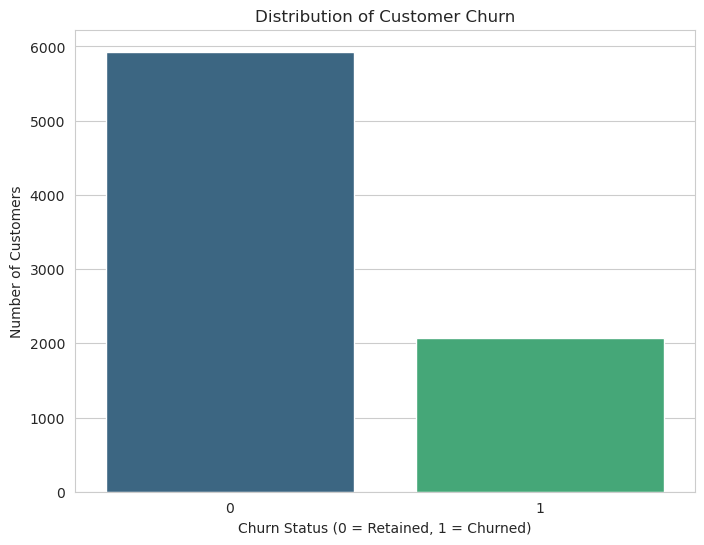

In [12]:
# 4. Visualization
# Visualization 1: Distribution of the Target Variable 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', data=df_cleaned, palette='viridis', hue='churn', legend=False)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)')
plt.ylabel('Number of Customers')
plt.show()


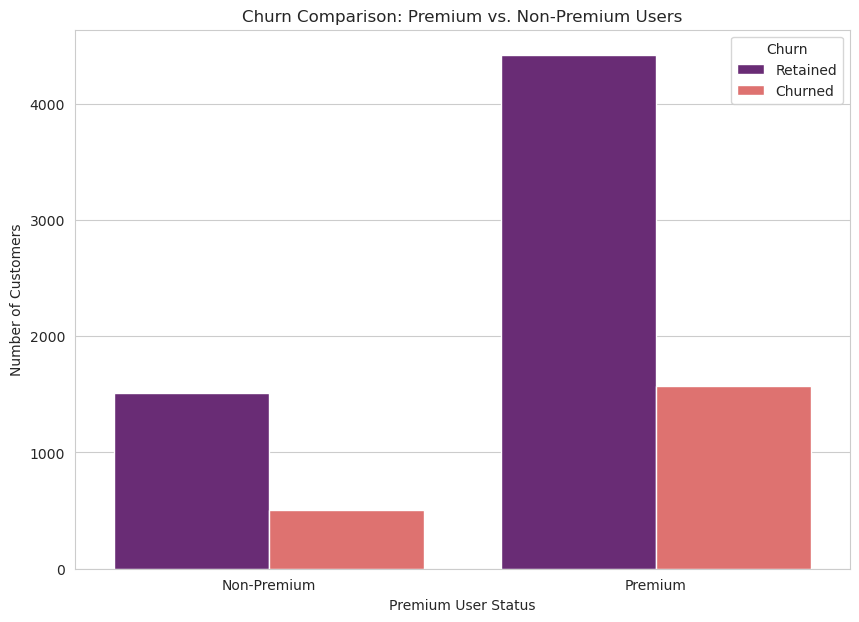

In [13]:
# Visualization 2: Churn Rate by Premium User Status
plt.figure(figsize=(10, 7))
sns.countplot(x='premium_user', hue='churn', data=df_cleaned, palette='magma')
plt.title('Churn Comparison: Premium vs. Non-Premium Users')
plt.xlabel('Premium User Status')
plt.xticks([0, 1], ['Non-Premium', 'Premium'])
plt.ylabel('Number of Customers')
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.show()

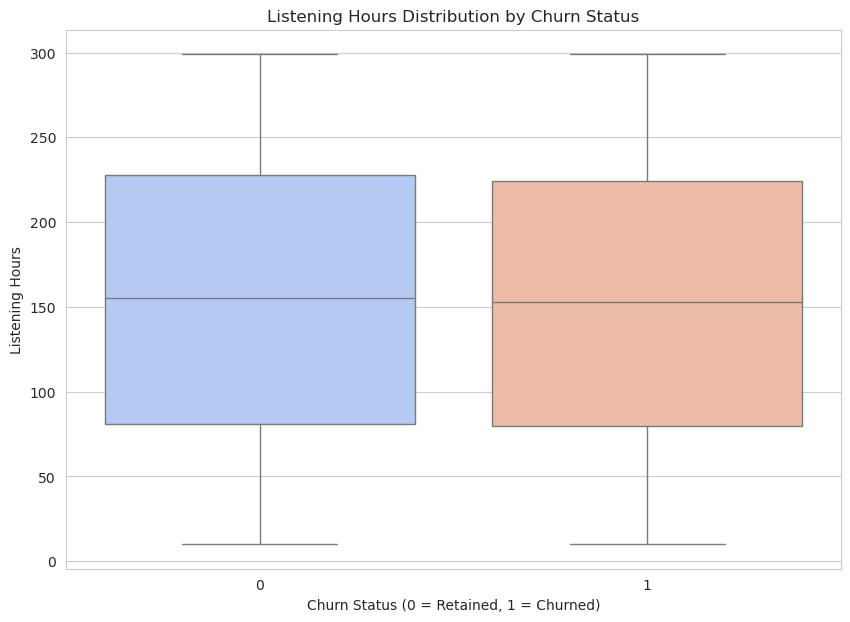

In [14]:
# Visualization 3: Listening Hours and Churn
plt.figure(figsize=(10, 7))
sns.boxplot(x='churn', y='listening_hours', data=df_cleaned, palette='coolwarm', hue='churn', legend=False)
plt.title('Listening Hours Distribution by Churn Status')
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)')
plt.ylabel('Listening Hours')
plt.show()

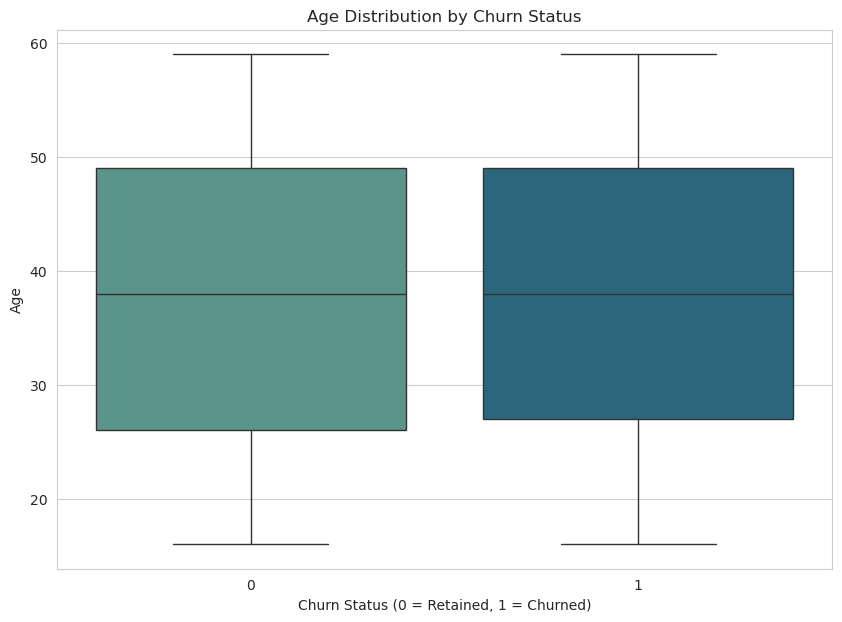

In [15]:
# Visualization 4: Age and Churn
plt.figure(figsize=(10, 7))
sns.boxplot(x='churn', y='age', data=df_cleaned, palette='crest', hue='churn', legend=False)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Churn Status (0 = Retained, 1 = Churned)')
plt.ylabel('Age')
plt.show()

In [16]:
# 5. Data Preprocessing for Modeling 
X = df_cleaned.drop(['churn', 'user_id'], axis=1)
y = df_cleaned['churn']

In [17]:
# Define features (X) and target (y)
# Drop user_id as it's an identifier and not a predictive feature
X = df_cleaned.drop(['churn', 'user_id'], axis=1)
y = df_cleaned['churn']

In [18]:
# One-hot encode categorical features to convert them into a numerical format
X = pd.get_dummies(X, columns=['gender', 'country', 'device_type'], drop_first=True)

In [19]:
# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [20]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("\n" + "="*50 + "\n")

Training set shape: (5600, 18)
Testing set shape: (2400, 18)




In [21]:
# 7. Model Building and Evaluation
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

In [22]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [23]:
# Make predictions on the unseen test data
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

In [25]:
# Print the final evaluation metrics
print("--- Logistic Regression Model Evaluation ---")
print(f"Accuracy Score: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)

--- Logistic Regression Model Evaluation ---
Accuracy Score: 0.7412

Classification Report:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1779
           1       0.00      0.00      0.00       621

    accuracy                           0.74      2400
   macro avg       0.37      0.50      0.43      2400
weighted avg       0.55      0.74      0.63      2400

